<a href="https://colab.research.google.com/github/Aakash280/Python_Machine_Learning/blob/main/Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("(PRETTYGARDEN Womens Casual Bodycon Pockets).csv")
df2 = pd.read_csv("amazon product review (Big Book Dashboards Visualizing Real World).csv")
df3 = pd.read_csv("sandisk (SanDisk 128GB MicroSDXC Memory Adapter).csv")
df4 = pd.read_csv("amazon product review (Apple AirPods Charging Latest Model).csv")
df5 = pd.read_csv("amazon product review (Acer A515 46 R3UB Display Quad Core Processor).csv")
df6 = pd.read_csv("amazon product review (Affresh Washer Machine Cleaner 6 Tablets).csv")
df7 = pd.read_csv("amazon product review (NETGEAR Wi Fi Range Extender EX3700).csv")
df8 = pd.read_csv("amazon product review (Seagate Portable External Hard Drive).csv")
df9 = pd.read_csv("amazon product review (TOZO T6 Bluetooth Headphones Waterproof).csv")

In [ ]:
df = df1.merge(df2, how='outer')
df = df.merge(df3, how='outer')
df = df.merge(df4, how='outer')
df = df.merge(df5, how='outer')
df = df.merge(df6, how='outer')
df = df.merge(df7, how='outer')
df = df.merge(df8, how='outer')
df = df.merge(df9, how='outer')

In [ ]:
df.shape

(24100, 8)

In [ ]:
df.columns

Index(['product_name', 'review_title', 'comment', 'rating', 'date', 'username',
       'profile_url', 'verified_purchase'],
      dtype='object')

In [ ]:
df.dtypes

product_name         object
review_title         object
comment              object
rating               object
date                 object
username             object
profile_url          object
verified_purchase      bool
dtype: object

In [ ]:
# Check for missing values
df.isnull().sum()

product_name          0
review_title          5
comment              87
rating                0
date                  0
username              1
profile_url           0
verified_purchase     0
dtype: int64

In [ ]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,product_name,review_title,comment,rating,date,username,profile_url,verified_purchase
125,PRETTYGARDEN Womens Casual Bodycon Pockets,Cute and comfortable. Color was lighter then p...,NaN,4.0 out of 5 stars,"December 5, 2022",Bambi,https://amazon.com//gp/profile/amzn1.account.A...,True
408,PRETTYGARDEN Womens Casual Bodycon Pockets,Very nice,NaN,5.0 out of 5 stars,"March 20, 2022",Anavel Castro,https://amazon.com//gp/profile/amzn1.account.A...,True
467,PRETTYGARDEN Womens Casual Bodycon Pockets,Seam split after two wears,NaN,2.0 out of 5 stars,"February 20, 2022",April A.,https://amazon.com//gp/profile/amzn1.account.A...,True
494,PRETTYGARDEN Womens Casual Bodycon Pockets,This dress is super cute and was so comfortable,NaN,5.0 out of 5 stars,"February 8, 2022",Josette McClanahan,https://amazon.com//gp/profile/amzn1.account.A...,True
530,PRETTYGARDEN Womens Casual Bodycon Pockets,"comfortable,you can dress it up or wear as a c...",NaN,5.0 out of 5 stars,"January 25, 2022",Dolores,https://amazon.com//gp/profile/amzn1.account.A...,True
...,...,...,...,...,...,...,...,...
22605,Seagate Portable External Hard Drive,Hasta el momento a funcionado muy bien con mi ...,NaN,5.0 out of 5 stars,"February 18, 2022",Luis,https://amazon.com//gp/profile/amzn1.account.A...,True
23212,Seagate Portable External Hard Drive,Handy and easy to use,NaN,5.0 out of 5 stars,"January 4, 2022",mihir jethwa,https://amazon.com//gp/profile/amzn1.account.A...,True
23295,Seagate Portable External Hard Drive,Not in its original box. That’s a no for me. I...,NaN,1.0 out of 5 stars,"December 29, 2021",Monica,https://amazon.com//gp/profile/amzn1.account.A...,True
23549,Seagate Portable External Hard Drive,"Yes, so far so good. It worked no problem.",NaN,4.0 out of 5 stars,"December 7, 2021",javier,https://amazon.com//gp/profile/amzn1.account.A...,True


In [ ]:
df["comment"].fillna("Average", inplace = True)

In [ ]:
# Now again Check for missing values
df.isnull().sum()

product_name         0
review_title         5
comment              0
rating               0
date                 0
username             1
profile_url          0
verified_purchase    0
dtype: int64

In [ ]:
## Create a dataframe with categorical columns
df_cat = df.select_dtypes(include =['object'])

,Total,Percent
review_title,5,0.000207
username,1,0.000041
product_name,0,0.000000
comment,0,0.000000
rating,0,0.000000
date,0,0.000000
profile_url,0,0.000000


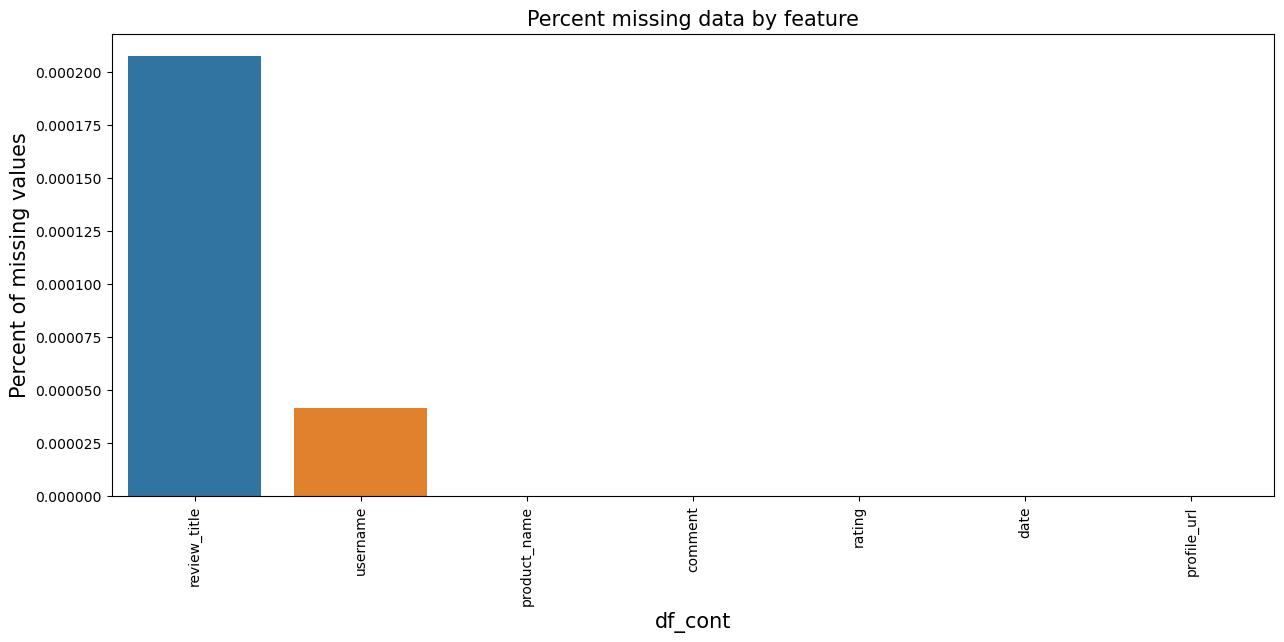

In [ ]:
# Percentage of missing values in each dataframe along with visualization
total = df_cat.isnull().sum().sort_values(ascending=False)
percent = (df_cat.isnull().sum()/df_cat.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

,Total,Percent
verified_purchase,0,0.0


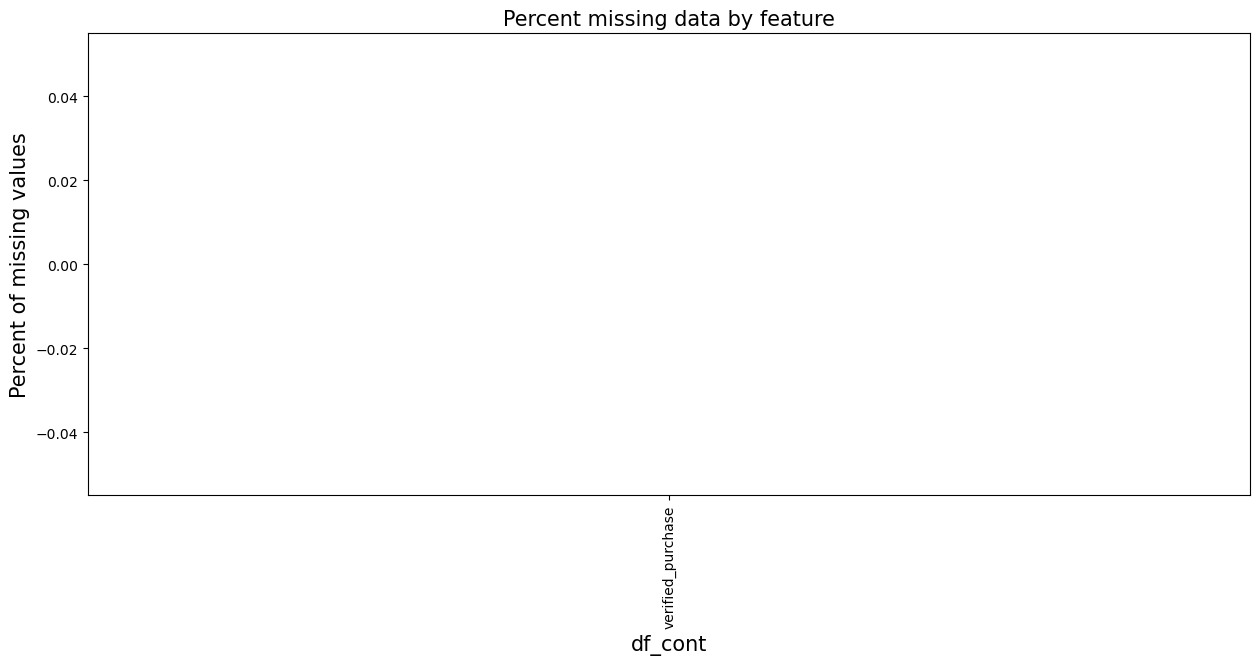

In [ ]:
## Create a dataframe with categorical columns
df_bool = df.select_dtypes(include =['bool'])

# Percentage of missing values in each dataframe along with visualization
total = df_bool.isnull().sum().sort_values(ascending=False)
percent = (df_bool.isnull().sum()/df_bool.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [ ]:
newdf = df.dropna()

In [ ]:
newdf.shape

(24094, 8)

In [ ]:
newdf.isnull().sum()

product_name         0
review_title         0
comment              0
rating               0
date                 0
username             0
profile_url          0
verified_purchase    0
dtype: int64

In [ ]:
# Identifying the unique number of values in the dataset
newdf.nunique()

product_name             9
review_title         18027
comment              23042
rating                   5
date                  1276
username             19398
profile_url          24002
verified_purchase        2
dtype: int64

In [ ]:
duplicate = newdf[newdf.duplicated('profile_url')]
duplicate

,product_name,review_title,comment,rating,date,username,profile_url,verified_purchase
1,PRETTYGARDEN Womens Casual Bodycon Pockets,"Size wrong, runs big","Sizes are way off, small is way big on me. I a...",2.0 out of 5 stars,"February 14, 2023",matt,https://amazon.com//gp/profile/amzn1.account.A...,True
3,PRETTYGARDEN Womens Casual Bodycon Pockets,Nice,"The dress is really nice. However, I was disap...",3.0 out of 5 stars,"February 14, 2023",Amazon Customer,https://amazon.com//gp/profile/amzn1.account.A...,True
5,PRETTYGARDEN Womens Casual Bodycon Pockets,Great dress not sure if it’s new,Love this dress! I love the fit and stretch. T...,4.0 out of 5 stars,"February 13, 2023",EQ,https://amazon.com//gp/profile/amzn1.account.A...,True
7,PRETTYGARDEN Womens Casual Bodycon Pockets,"Stretchy material, great fit!","Loved this dress! His my mom pooch, and was v...",5.0 out of 5 stars,"February 12, 2023",BBHigglet,https://amazon.com//gp/profile/amzn1.account.A...,True
9,PRETTYGARDEN Womens Casual Bodycon Pockets,Disappointed,5'3 125.3lbs i really wanted to like this dres...,1.0 out of 5 stars,"February 12, 2023",Gv,https://amazon.com//gp/profile/amzn1.account.A...,True
...,...,...,...,...,...,...,...,...
23591,Seagate Portable External Hard Drive,Perfect,Perfect for my Xbox one,5.0 out of 5 stars,"December 3, 2021",Trevor,https://amazon.com//gp/profile/amzn1.account.A...,True
23726,Seagate Portable External Hard Drive,Great product,Great product,4.0 out of 5 stars,"November 21, 2021",Michael Hamilton,https://amazon.com//gp/profile/amzn1.account.A...,True
23957,Seagate Portable External Hard Drive,Big Enough ( for now),10TB purchased for a NextCloud backup server. ...,5.0 out of 5 stars,"October 28, 2021",Joe5555,https://amazon.com//gp/profile/amzn1.account.A...,True
23976,Seagate Portable External Hard Drive,LOVE IT!,"I used one drive, but got tired of issues (nam...",5.0 out of 5 stars,"October 26, 2021",NR,https://amazon.com//gp/profile/amzn1.account.A...,True


In [ ]:
newdf.drop_duplicates(subset="profile_url")

,product_name,review_title,comment,rating,date,username,profile_url,verified_purchase
20,PRETTYGARDEN Womens Casual Bodycon Pockets,Yes!!,I received so many compliments on this dress! ...,5.0 out of 5 stars,"February 9, 2023",Kedra,https://amazon.com//gp/profile/amzn1.account.A...,True
21,PRETTYGARDEN Womens Casual Bodycon Pockets,Beautiful dress,"I love this dress, wore it to an office and it...",5.0 out of 5 stars,"February 8, 2023",M. C. Miranda Leon,https://amazon.com//gp/profile/amzn1.account.A...,True
22,PRETTYGARDEN Womens Casual Bodycon Pockets,Great fitting,"It's very flattering, especially for girls wit...",5.0 out of 5 stars,"February 8, 2023",B Cast,https://amazon.com//gp/profile/amzn1.account.A...,True
23,PRETTYGARDEN Womens Casual Bodycon Pockets,Most comfortable dress ever,This fit in all of the right places. So flatt...,5.0 out of 5 stars,"February 7, 2023",Michele Smading,https://amazon.com//gp/profile/amzn1.account.A...,True
24,PRETTYGARDEN Womens Casual Bodycon Pockets,Love it,I love this dress so much I had to get it in r...,5.0 out of 5 stars,"February 5, 2023",Octavia Davis,https://amazon.com//gp/profile/amzn1.account.A...,True
...,...,...,...,...,...,...,...,...
24095,TOZO T6 Bluetooth Headphones Waterproof,Second time I've orderec,These work great.,5.0 out of 5 stars,"March 26, 2023",Lynn Maple,https://amazon.com//gp/profile/amzn1.account.A...,True
24096,TOZO T6 Bluetooth Headphones Waterproof,Excellent sound and long battery life,Very nice quality before you even take the hea...,5.0 out of 5 stars,"March 26, 2023",Rick Dorsino,https://amazon.com//gp/profile/amzn1.account.A...,True
24097,TOZO T6 Bluetooth Headphones Waterproof,So so,While i love these ear buds and the sound they...,3.0 out of 5 stars,"March 26, 2023",Abiah Crain,https://amazon.com//gp/profile/amzn1.account.A...,True
24098,TOZO T6 Bluetooth Headphones Waterproof,I only have 2 complaints,The earbuds themselves work great. They fit we...,4.0 out of 5 stars,"March 26, 2023",Ashley Calloway,https://amazon.com//gp/profile/amzn1.account.A...,True


In [ ]:
newdf.shape

(23910, 8)

In [ ]:
newdf.nunique()

product_name             9
review_title         17918
comment              22900
rating                   5
date                  1276
username             19328
profile_url          23910
verified_purchase        2
dtype: int64

In [ ]:
# Viewing the data statistics
newdf.describe()

,product_name,review_title,comment,rating,date,username,profile_url,verified_purchase
count,23910,23910,23910,23910,23910,23910,23910,23910
unique,9,17918,22900,5,1276,19328,23910,2
top,Apple AirPods Charging Latest Model,Great,Average,5.0 out of 5 stars,"October 14, 2022",Amazon Customer,https://amazon.com//gp/profile/amzn1.account.A...,True
freq,4977,182,83,13672,69,1382,1,22856


In [ ]:
newdf.to_csv('Final Dataset.csv')